# Week 1 Read the resources

1. Understanding of the problem/ Research/Hypothesis 
2. Get the data/
Where is it/
Can you process it? 

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Import package

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns; sns.set()
# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 1. Data Extraction

### Download and Prepare PHM08 dataset

In [2]:
df=pd.read_csv('/Users/philippebeliveau/Desktop/BSTA 478/Projet/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Divide data set between features and target
features=df.drop(['Class'], axis=1)
target = df['Class']

In [4]:
target_df=pd.DataFrame(target)

Information about the dataset: 

 The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

What does the columns represent:

PCA features
This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

PCA features are not correlated
It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.!

So those columns are those PCA features

# Week 2 Perform EDA
2. Data cleaning: 
Define standards, drop columns, missing values, feature engineering 
    
3. Data visualization  (EDA): Derived insight from the data and engine



## 1. Data cleaning
### 2.1 Define standards, drop columns, missing values, feature engineering 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
print('The dataframe has {} rows'.format(df.shape[0]))
print('The dataframe has {} columns'.format(df.shape[1]))

The dataframe has 284807 rows
The dataframe has 31 columns


### Missing Values?

Make sure that our dataset does not possess any NaN values, and give some explanantion about what would this entails if we had some

In [ ]:
# Look for NA values
df.isna().sum()

After having clean missing value, we are now left with this DataFrame to perform our EDA 

## Balance Dataset = No need for autoencoders

## Scale resample

## 2. EDA = See Dimensionality reduction file

## KMeans + PCA

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[0.55323648 0.2151192  0.05297858]


/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



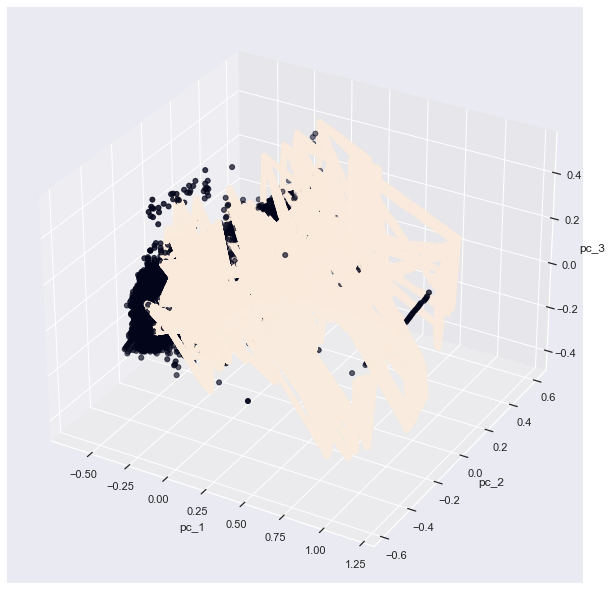

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(X_scaled_resampled).astype(np.float)
#y =df.iloc[:,30]
y = y_resampled

pca=PCA(3)
pca_result = pca.fit_transform(X_scaled_resampled)

print(pca.explained_variance_ratio_)

pca_df= pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
pca_df=pd.concat([pca_df, pd.DataFrame({'label':y})], axis=1)

ax = Axes3D(plt.figure(figsize=(8, 8)))
ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
ax.set_xlabel("pc_1")
ax.set_ylabel("pc_2")
ax.set_zlabel("pc_3")
plt.show()

#So here every index refers to the cluster that he his in it
#So to plot the cluster, we

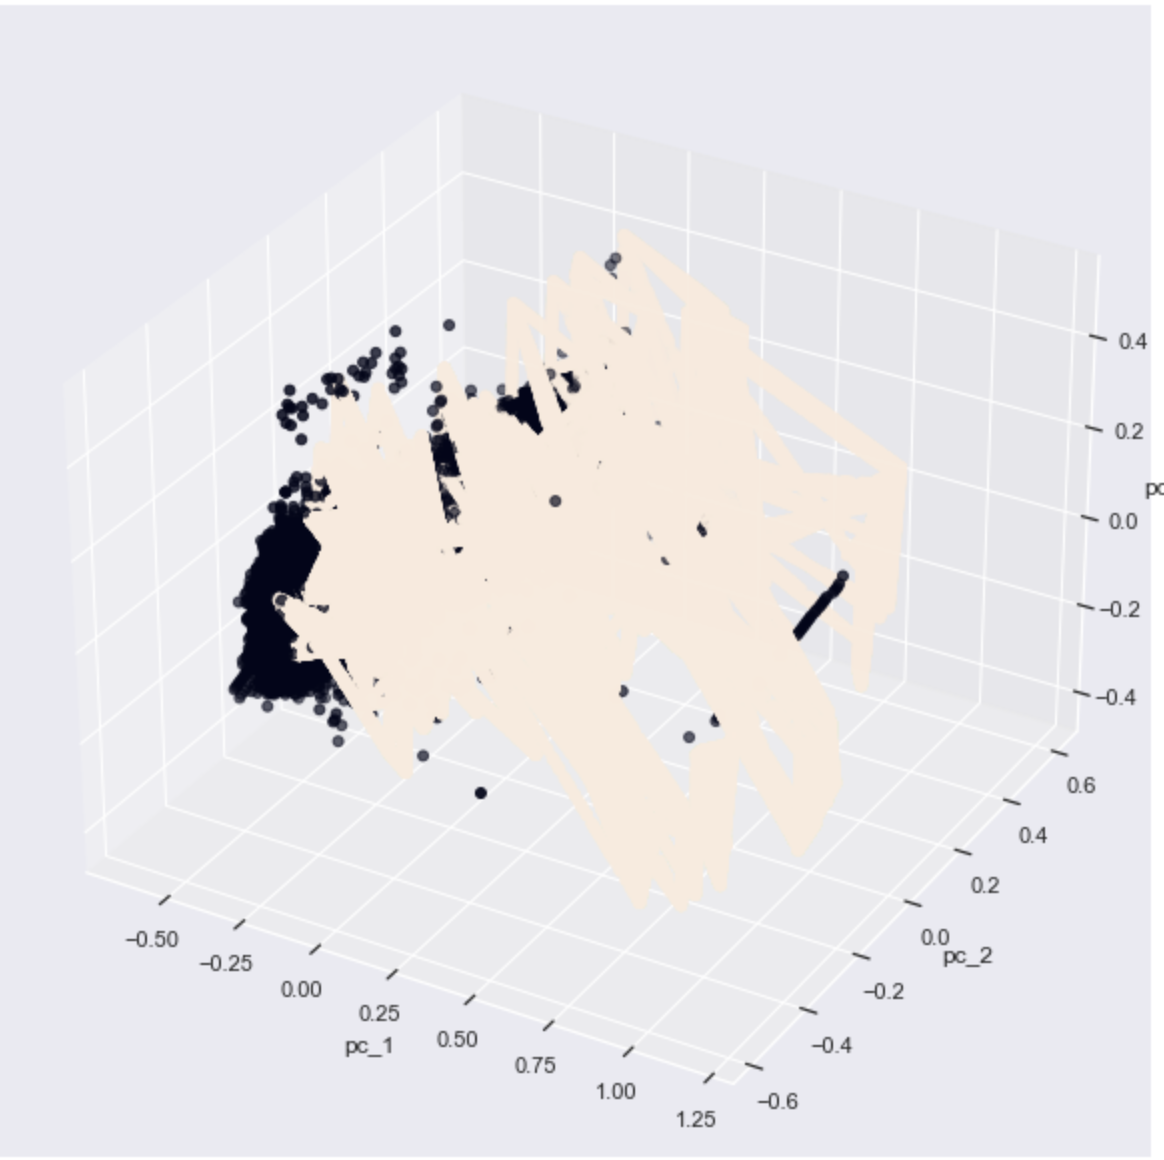

Here we can better visualize the non-fraud observations in this 3D cloud because I resampled the data, resampling refers to balancing the number of occurences of the target variable.  


df_anomaly = df[df[df.columns[30]] > 0]
df_normal = df[df[df.columns[30]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df = pd.concat([ df_anomaly, df_normal])

show_pca_df(df)

### https://www.askpython.com/python/examples/plot-k-means-clusters-python

## Conclusion of EDA

In [ ]:
#Question to ask: 
# are we including the settings names?
# So what are we face off? 
# What else could I add in my EDA?

# Week 3 (19 – 5 march)  Perform the data preparation 
4. Data partitioning 
5. Data preparation 
6. Scaling
6. Feature selection and creation 
4. Test of Stationarity for all features
4. Lag values + AR + MA terms 
4. Multicollinearity
	


## 1. Data preprocessing 

### Data partitioning

It is now important to drop the columnns that are insignificant or that are literaly giving the information about the Remaining useful life. Think about it, when a new engine is functioning, what information do we have about it, we can't have the max cycles that he reached, because he is still running.

And, we can't give him our model the RUL, because this is what we are trying to predict

### 2. Scaling

Question: 

Why scaling?

In [5]:
X = np.array(features).astype(np.float)

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [6]:
X_scaled_df = pd.DataFrame(X_scaled)
target_df = pd.DataFrame(target)

## Week 4 (5 march – 19 march) Algorithm
7.Data format to enter in the algorithm (This will change given the algorithm) 

8.Implementation of the algorithms/ Which one to use? /hyperparameter tuning (Grid search) 


# Variational Autoencoders

https://towardsdatascience.com/applying-anomaly-detection-with-autoencoders-to-fraud-detection-feaaee6b5b09

### 1. Data format 

# Narrative

We have to train our model on the normal transactions and give the anomaly to predict to the AE. Then, we will look at the prediction of the AE and see if there is a large disruption between the actual value 
and the predicted value. If there is a big difference, we might flag this transaction as an anomaly. 



In [7]:
# So let's build the normal and anomaly data. 

# Dataframe
y = np.array(target_df).astype(np.float)
df_input = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame({'Y_Fraud_N':y.flatten()})], axis=1)

df_non_fraud= df_input[df_input['Y_Fraud_N']==0]
df_fraud_ = df_input[df_input['Y_Fraud_N']==1]

# Take off the Y_Fraud_N variable 

df_non_fraud = df_non_fraud.drop('Y_Fraud_N', axis=1)
df_fraud = df_fraud_.drop('Y_Fraud_N', axis=1)

print('Shape of non_fraud {}'.format(df_non_fraud.shape))

print('Shape of fraud {}'.format(df_fraud.shape))

Shape of non_fraud (284315, 30)
Shape of fraud (492, 30)


/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_non_fraud, test_size=0.2)

n_features= df_non_fraud.shape[1]

### 2. Implementation of the algorithms 

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing, model_selection
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
import seaborn as sns
import keras
import tensorflow as tf

dataset_seed : Random seed for shuffling dataset

scale : % of the dataset to use (1. for 100%)

latent_dim : Dimension of the latent space

train_prop : Percentage for train (the rest being for the test)

batch_size : Batch sizeepochs : Nb of epochs for training\

fit_verbosity is the verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epoch

## Parameters

Step 2 - Parameters
- scale : With scale=1, we need 1'30s on a GPU V100 ...and >20' on a CPU !\
- latent_dim : 2 dimensions is small, but usefull to draw !\
- fit_verbosity : verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epochloss_weights : Our loss function is the weighted sum of two loss:
- r_loss which measures the loss during reconstruction.  kl_loss which measures the dispersion.  

- The weights are defined by: loss_weights=[k1,k2] where : total_loss = k1*r_loss + k2*kl_lossIn practice, a value of \[1,.001\] gives good results here.

In [10]:
dataset_seed     = 123

scale            = 0.5

latent_dim       = 5

train_prop       = .8
batch_size       = 64
epochs           = 5
fit_verbosity    = 1
loss_weights  = [0.5,.01]


# Encoder

In this example, we will use the functional API.
For this, we will use two custom layers :
- SamplingLayer, which generates a vector z from the parameters z_mean and z_log_var - See : SamplingLayer.py
- VariationalLossLayer, which allows us to calculate the loss function, loss - See : VariationalLossLayer.py

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import display,Markdown

# Note : https://keras.io/guides/making_new_layers_and_models_via_subclassing/

class SamplingLayer(keras.layers.Layer):
    '''A custom layer that receive (z_mean, z_var) and sample a z vector'''

    def call(self, inputs):
        
        z_mean, z_log_var = inputs
        
        batch_size = tf.shape(z_mean)[0]
        latent_dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch_size, latent_dim))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        
        return z


In [12]:
inputs = keras.Input(shape=(n_features))
x = layers.Dense(20, activation=activations.relu)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(15, activation=activations.relu)(x)
x = layers.Dense(10, activation=activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dense(5, activation=activations.relu)(x)

z_mean    = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z         = SamplingLayer()([z_mean, z_log_var])

encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                

2022-04-03 13:51:39.321275: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Decoder

In [13]:
inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(5, activation=activations.relu)(inputs)
x = layers.Dense(10, activation=activations.relu)(x)
x = layers.Dense(15, activation=activations.relu)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(30, activation=activations.relu)(x)

decoder = keras.Model(inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
 dense_6 (Dense)             (None, 15)                165       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 30)                480       
                                                                 
Total params: 735
Trainable params: 735
Non-trainable param

# VAE

In [14]:
# ------------------------------------------------------------------
#     _____ _     _ _
#    |  ___(_) __| | | ___
#    | |_  | |/ _` | |/ _ \
#    |  _| | | (_| | |  __/
#    |_|   |_|\__,_|_|\___|                              VAE Example
# ------------------------------------------------------------------
# Formation Introduction au Deep Learning  (FIDLE)
# CNRS/SARI/DEVLOG 2020 - S. Arias, E. Maldonado, JL. Parouty
# ------------------------------------------------------------------
# by JL Parouty (dec 2020), based on François Chollet example
#
# Thanks to François Chollet example : https://keras.io/examples/generative/vae


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import display,Markdown
import os


# Note : https://keras.io/guides/making_new_layers_and_models_via_subclassing/



class VAE(keras.Model):
    '''
    A VAE model, built from given encoder and decoder
    '''

    version = '1.4'

    def __init__(self, encoder=None, decoder=None, loss_weights=[1,1], **kwargs):
        '''
        VAE instantiation with encoder, decoder and r_loss_factor
        args :
            encoder : Encoder model
            decoder : Decoder model
            loss_weights : Weight of the loss functions: reconstruction_loss and kl_loss
            r_loss_factor : Proportion of reconstruction loss for global loss (0.3)
        return:
            None
        '''
        super(VAE, self).__init__(**kwargs)
        self.encoder      = encoder
        self.decoder      = decoder
        self.loss_weights = loss_weights
        print(f'Fidle VAE is ready :-)  loss_weights={list(self.loss_weights)}')
       
        
    def call(self, inputs):
        '''
        Model forward pass, when we use our model
        args:
            inputs : Model inputs
        return:
            output : Output of the model 
        '''
        z_mean, z_log_var, z = self.encoder(inputs)
        output               = self.decoder(z)
        return output
                
        
    def train_step(self, input):
        '''
        Implementation of the training update.
        Receive an input, compute loss, get gradient, update weights and return metrics.
        Here, our metrics are loss.
        args:
            inputs : Model inputs
        return:
            loss    : Total loss
            r_loss  : Reconstruction loss
            kl_loss : KL loss
        '''
        
        # ---- Get the input we need, specified in the .fit()
        #
        if isinstance(input, tuple):
            input = input[0]
        
        k1,k2 = self.loss_weights
        
        # ---- Forward pass
        #      Run the forward pass and record 
        #      operations on the GradientTape.
        #
        with tf.GradientTape() as tape:
            
            # ---- Get encoder outputs
            #
            z_mean, z_log_var, z = self.encoder(input)
            
            # ---- Get reconstruction from decoder
            #
            reconstruction       = self.decoder(z)
         
            # ---- Compute loss
            #      Reconstruction loss, KL loss and Total loss
            #
            reconstruction_loss  = k1 * tf.reduce_mean( keras.losses.binary_crossentropy(input, reconstruction) )

            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = -tf.reduce_mean(kl_loss) * k2

            total_loss = reconstruction_loss + kl_loss

        # ---- Retrieve gradients from gradient_tape
        #      and run one step of gradient descent
        #      to optimize trainable weights
        #
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        return {
            "loss":     total_loss,
            "r_loss":   reconstruction_loss,
            "kl_loss":  kl_loss,
        }
    
    
    def predict(self,inputs):
        '''Our predict function...'''
        z_mean, z_var, z  = self.encoder.predict(inputs)
        outputs           = self.decoder.predict(z)
        return outputs

        
    def save(self,filename):
        '''Save model in 2 part'''
        filename, extension = os.path.splitext(filename)
        self.encoder.save(f'{filename}-encoder.h5')
        self.decoder.save(f'{filename}-decoder.h5')

    
    def reload(self,filename):
        '''Reload a 2 part saved model.'''
        filename, extension = os.path.splitext(filename)
        self.encoder = keras.models.load_model(f'{filename}-encoder.h5', custom_objects={'SamplingLayer': SamplingLayer})
        self.decoder = keras.models.load_model(f'{filename}-decoder.h5')
        print('Reloaded.')
                
        
    @classmethod
    def about(cls):
        '''Basic whoami method'''
        display(Markdown('<br>**FIDLE 2021 - VAE**'))
        print('Version              :', cls.version)
        print('TensorFlow version   :', tf.__version__)
        print('Keras version        :', tf.keras.__version__)


In [15]:
vae = VAE(encoder, decoder, loss_weights)

vae.compile(optimizer='adam')

Fidle VAE is ready :-)  loss_weights=[0.5, 0.01]


## Let's train!

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7094/7108 [============================>.] - ETA: 0s - loss: 0.3353 - r_loss: 0.3352 - kl_loss: 1.1741e-04WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f81ab816560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGR

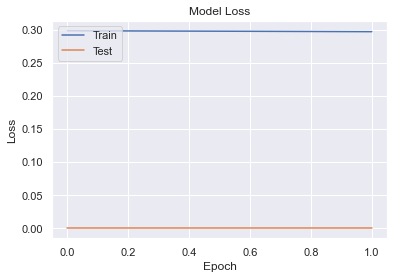

In [16]:
# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=1, restore_best_weights=True)
history = vae.fit(x=train_set, y=train_set, epochs=epochs, verbose=1, validation_data=[test_set, test_set], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Prediction

In [17]:
train_predicted_x = vae.predict(train_set)
train_events_mse = losses.mean_squared_error(train_set, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [18]:
plot_samples = 492

# normal event
real_x = test_set[:plot_samples].values.reshape(plot_samples, n_features)
predicted_x = vae.predict(real_x)
normal_events_mse = losses.mean_squared_error(real_x, predicted_x)
normal_events_df = pd.DataFrame({
'mse': normal_events_mse,
'n': np.arange(0, plot_samples),
'anomaly': np.zeros(plot_samples)})

In [19]:
# abnormal event
abnormal_x =df_fraud[:plot_samples].values.reshape(plot_samples, n_features)
predicted_x = vae.predict(abnormal_x)
abnormal_events_mse = losses.mean_squared_error(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
'mse': abnormal_events_mse,
'n': np.arange(0, plot_samples),
'anomaly': np.ones(plot_samples)})

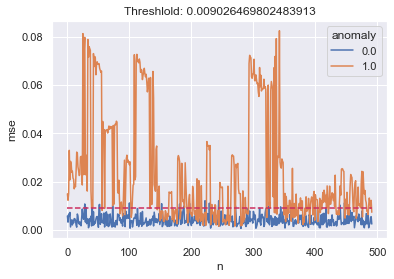

In [20]:
import matplotlib.lines as lines
mse_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mse_df.n, y=mse_df.mse, hue=mse_df.anomaly)

line = lines.Line2D(
xdata=np.arange(0, plot_samples),
ydata=np.full(plot_samples, cut_off),
color='#CC2B5E',
linewidth=1.5,
linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off))
plt.show()

## Visualization of the latent space

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



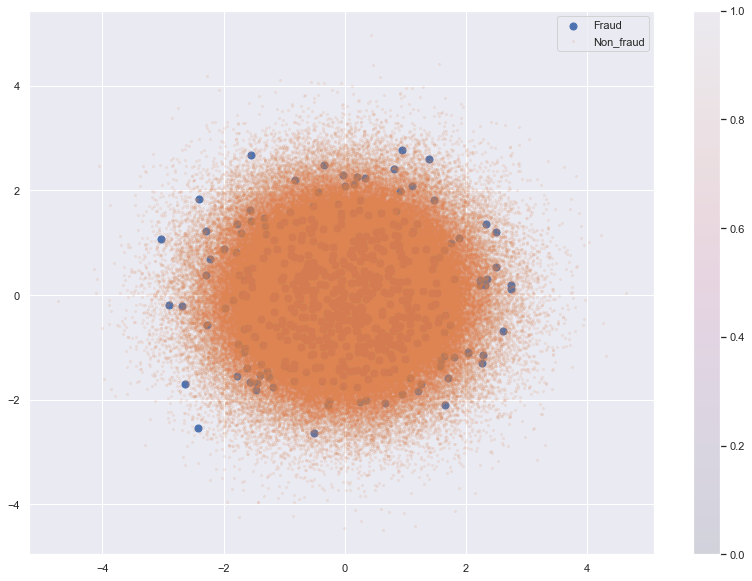

In [49]:
# ---- Get latent points

z_mean_fraud, z_var_fraud, z_fraud = vae.encoder.predict(df_fraud)
z_mean, z_var, z = vae.encoder.predict(df_non_fraud)

# ---- Show them

fig = plt.figure(figsize=(14, 10))
plt.scatter(z_fraud[:, 0] , z_fraud[:, 1], alpha=1, s=50, label='Fraud')
plt.scatter(z[:, 0] , z[:, 1], alpha=0.1, s=5, label="Non_fraud")
plt.colorbar()
plt.legend()
# pwk.save_fig('07-Latent-space')
plt.show()

# Week 5 (19 march – 2 april) 
9. Model performance

10. Performance measures (RMSE, MAE,…) 
    
11. Feature importance

12. Evaluation of the results (Overfitting )
	
13. Interpretation of the results  



### 1. Performance measure

RMSE 
MAE
(...)

In [21]:
mse_abnormal = pd.DataFrame(abnormal_events_mse)

In [22]:
#.I have to change the mse_abnormal 

good = []
bad=[]
def classify(mse, cutoff): 
    for row in mse_abnormal.itertuples(index=False):
        if row >= cutoff:
            count_good  =good.append(1)
        else: 
            count_bad = bad.append(0)    

In [23]:
classify(pd.DataFrame(abnormal_events_mse), cut_off)
print('The ratio of well classify abnormal transactions is:{}'.format((len(good)/len(mse_abnormal))))

The ratio of well classify abnormal transactions is:0.6829268292682927


### 2. Feature importance

I don't know how to actually look at the importance for a NN

### 3. Evaluation of the results

### 4. Interpretation of the results

# Week 6 (2 april – 10 april) 
10. Develop presentation

11. Wrapping up
